In [1]:
import pandas as pd
import numpy as np

In [2]:
# Train dataset
df=pd.read_csv(r'C:\Users\inbox\Downloads\Train_UWu5bXk.txt')

In [3]:
# Train dataset
test=pd.read_csv(r'C:\Users\inbox\Downloads\Test_u94Q5KV.txt')

In [4]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Exploratory Data Analysis

In [5]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df.shape

(8523, 12)

In [8]:
# Percentage of missing values
print('Percentage of missing values in Item_Weight is: ',(df['Item_Weight'].isnull().sum()/df.shape[0])*100)

Percentage of missing values in Item_Weight is:  17.165317376510618


In [9]:
# Percentage of missing values
print('Percentage of missing values in Outlet_Size is: ',(df['Outlet_Size'].isnull().sum()/df.shape[0])*100)

Percentage of missing values in Outlet_Size is:  28.27642848762173


In [10]:
# Replacing missing values with 0
df['Item_Weight'].replace(np.NaN,0,inplace=True)
#df['Outlet_Size'].replace(np.NaN,0,inplace=True)

In [11]:
df['Item_Weight'].isnull().sum()

0

In [12]:
# Finding median for item weight(Note that there is no item weight is 0)
itemWeightMedian=0
tempDf=df[df['Item_Weight']!=0]
tempDf=tempDf['Item_Weight']
itemWeightList=tempDf.sort_values()
l=len(itemWeightList)
if (l/2)!=0:
    itemWeightMedian=itemWeightList[int(l/2)]
else:
    itemWeightMedian=(itemWeightList[int(l/2)]+itemWeightList[int((l/2))+1])/2
itemWeightMedian    

12.5

In [13]:
# Replacing missing values in item weight with median
df['Item_Weight'].replace(0,itemWeightMedian,inplace=True)

In [14]:
df[df['Item_Weight']==0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [15]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [16]:
# Finding mode for outlet size
outletSizeMode=df['Outlet_Size'].mode()
outletSizeMode[0]

'Medium'

In [17]:
# Replacing missing values in item weight with median
df['Item_Weight'].replace(0,itemWeightMedian,inplace=True)

In [18]:
# Replacing missing values in outlet size with mode
df['Outlet_Size'].replace(np.NaN,outletSizeMode[0],inplace=True)

In [19]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [20]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [21]:
df.shape

(8523, 12)

In [22]:
df['Item_Identifier'].nunique()

1559

### Label Encoding

In [23]:
# Label encoding the target variable
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
df['encoded_Item_Identifier']=Encoder.fit_transform(df['Item_Identifier'])

In [24]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [25]:
df['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)
df['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
df['Item_Fat_Content'].replace('reg','Regular',inplace=True)

In [26]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [27]:
df['encoded_Item_Fat_Content']=Encoder.fit_transform(df['Item_Fat_Content'])

In [28]:
# Item Type
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [29]:
df['encoded_Item_Type']=Encoder.fit_transform(df['Item_Type'])

In [30]:
# For Outlet_Identifier
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [31]:
df['encoded_Outlet_Identifier']=Encoder.fit_transform(df['Outlet_Identifier'])

In [32]:
df['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [33]:
df['encoded_Outlet_Establishment_Year']=Encoder.fit_transform(df['Outlet_Establishment_Year'])

In [34]:
df['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [35]:
df['encoded_Outlet_Size']=Encoder.fit_transform(df['Outlet_Size'])

In [36]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [37]:
df['encoded_Outlet_Location_Type']=Encoder.fit_transform(df['Outlet_Location_Type'])

In [38]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [39]:
df['encoded_Outlet_Type']=Encoder.fit_transform(df['Outlet_Type'])

In [40]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,encoded_Item_Identifier,encoded_Item_Fat_Content,encoded_Item_Type,encoded_Outlet_Identifier,encoded_Outlet_Establishment_Year,encoded_Outlet_Size,encoded_Outlet_Location_Type,encoded_Outlet_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,156,0,4,9,4,1,0,1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8,1,14,3,8,1,2,2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,662,0,10,9,4,1,0,1
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,1121,1,6,0,3,1,2,0
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1297,0,9,1,1,0,2,1


In [41]:
# Preparing a dictionary for item identifer labels
itemDict={}
for i in df.index:
    itemDict[df['Item_Identifier'][i]]=df['encoded_Item_Identifier'][i]

In [42]:
# Preparing a dictionary for item fat content labels
fatDict={}
for i in df.index:
    fatDict[df['Item_Fat_Content'][i]]=df['encoded_Item_Fat_Content'][i]

In [43]:
# Preparing a dictionary for item type labels
typeDict={}
for i in df.index:
    typeDict[df['Item_Type'][i]]=df['encoded_Item_Type'][i]

In [44]:
# Preparing a dictionary for outlet id labels
outletIdDict={}
for i in df.index:
    outletIdDict[df['Outlet_Identifier'][i]]=df['encoded_Outlet_Identifier'][i]

In [45]:
# Preparing a dictionary for outlet establishment year labels
outletYearDict={}
for i in df.index:
    outletYearDict[df['Outlet_Establishment_Year'][i]]=df['encoded_Outlet_Establishment_Year'][i]

In [46]:
# Preparing a dictionary for outlet size labels
outletSizeDict={}
for i in df.index:
    outletSizeDict[df['Outlet_Size'][i]]=df['encoded_Outlet_Size'][i]

In [47]:
# Preparing a dictionary for outlet location labels
outletLocType={}
for i in df.index:
    outletLocType[df['Outlet_Location_Type'][i]]=df['encoded_Outlet_Location_Type'][i]

In [48]:
# Preparing a dictionary for outlet type labels
outletType={}
for i in df.index:
    outletType[df['Outlet_Type'][i]]=df['encoded_Outlet_Type'][i]

In [49]:
# Preparing the final train data

finaldf=pd.DataFrame()
finaldf['Item_Identifier']=df['encoded_Item_Identifier']
finaldf['Item_Weight']=df['Item_Weight']
finaldf['Item_Fat_Content']=df['encoded_Item_Fat_Content']
finaldf['Item_Visibility']=df['Item_Visibility']
finaldf['Item_Type']=df['encoded_Item_Type']
finaldf['Item_MRP']=df['Item_MRP']
finaldf['Outlet_Identifier']=df['encoded_Outlet_Identifier']
finaldf['Outlet_Establishment_Year']=df['encoded_Outlet_Establishment_Year']
finaldf['Outlet_Size']=df['encoded_Outlet_Size']
finaldf['Outlet_Location_Type']=df['encoded_Outlet_Location_Type']
finaldf['Outlet_Type']=df['encoded_Outlet_Type']
finaldf['Item_Outlet_Sales']=df['Item_Outlet_Sales']

In [50]:
finaldf.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,4,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,8,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,4,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,3,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1,0,2,1,994.7052


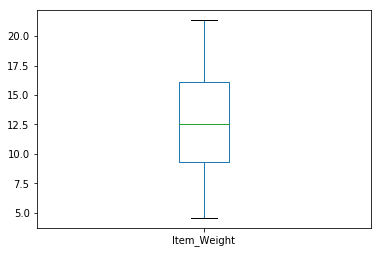

In [169]:
# For Item_Weight
import matplotlib.pyplot as plt
finaldf['Item_Weight'].plot.box() 
plt.show()

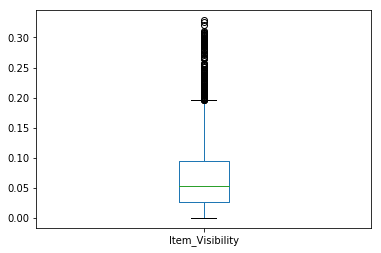

In [52]:
# For Item_Visibility
import matplotlib.pyplot as plt
finaldf['Item_Visibility'].plot.box() 
plt.show()

In [53]:
Q1 = finaldf['Item_Visibility'].quantile(0.25)
Q3 = finaldf['Item_Visibility'].quantile(0.75)
IQR = Q3 - Q1
noOfOutliers=((finaldf['Item_Visibility'] < (Q1 - 1.5 * IQR)) | (finaldf['Item_Visibility'] > (Q3 + 1.5 * IQR))).sum()
print('Percantage of outliers in Item_Visibility is:',(noOfOutliers/finaldf.shape[0])*100)

Percantage of outliers in Item_Visibility is: 1.689545934530095


In [54]:
# Removing rows with outliers in age
finaldf = finaldf.loc[(finaldf['Item_Visibility'] >= (Q1 - 1.5 * IQR)) & (finaldf['Item_Visibility'] <= (Q3 + 1.5 * IQR))]

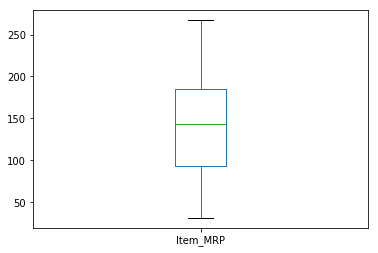

In [55]:
# For Item_MRP
finaldf['Item_MRP'].plot.box()
plt.show()

# We will use K-means Clustering technique to create a column inorder to identify the clusters

In [56]:
numerical_data=finaldf.iloc[:,0:10]

In [57]:
numerical_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type
0,156,9.30,0,0.016047,4,249.8092,9,4,1,0
1,8,5.92,1,0.019278,14,48.2692,3,8,1,2
2,662,17.50,0,0.016760,10,141.6180,9,4,1,0
3,1121,19.20,1,0.000000,6,182.0950,0,3,1,2
4,1297,8.93,0,0.000000,9,53.8614,1,1,0,2


In [58]:
#Importing the K-Means class
from sklearn.cluster import KMeans

wcss = []
#We will fit the kmeans algorithm to our data and then find the wcss for each number of clusters and 
#append it to the wcss list declared above
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init = 'k-means++',max_iter=300,n_init = 10,random_state=0)
    # the purpose of max_iter : Each time you click update centroids, a new iteration is performed. 
    #It makes sense, because when centroids are moved, distances to those centroids also change and some
    #points may change cluster.
    #n_init : the number of times k means algorithm will run with different initial centroids(default is 10)
    kmeans.fit(numerical_data)
    wcss.append(kmeans.inertia_) 
#We will then use the elbow method to determine the number of clusters

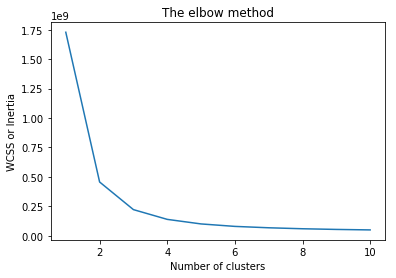

In [59]:
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS or Inertia')
plt.show()

In [60]:
#the optimal number of clusters seems to be 2
kmeans = KMeans(n_clusters=2,init = 'k-means++',max_iter=300,n_init = 10,random_state=0)
y_kmeans = kmeans.fit_predict(numerical_data)

In [61]:
finaldf['clusterid']=y_kmeans

In [62]:
finaldf.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,clusterid
0,156,9.30,0,0.016047,4,249.8092,9,4,1,0,1,3735.1380,1
1,8,5.92,1,0.019278,14,48.2692,3,8,1,2,2,443.4228,1
2,662,17.50,0,0.016760,10,141.6180,9,4,1,0,1,2097.2700,1
3,1121,19.20,1,0.000000,6,182.0950,0,3,1,2,0,732.3800,0
4,1297,8.93,0,0.000000,9,53.8614,1,1,0,2,1,994.7052,0


# Model Training and Evaluation

### Linear Regression

In [63]:
from sklearn import datasets, linear_model, metrics

In [64]:
X=['Item_Identifier','Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type','clusterid']
reg = linear_model.LinearRegression()
reg.fit(finaldf[X],finaldf['Item_Outlet_Sales'])
len(X)

12

In [65]:
test=pd.read_csv(r'C:\Users\inbox\Downloads\Test_u94Q5KV.txt')

In [66]:
test.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [67]:
testdf=pd.DataFrame()
testdf=test.copy(deep=True)
testdf['Item_Identifier']=test['Item_Identifier'].map(itemDict)

In [68]:
testdf['Item_Identifier'].head(5)

0    1114
1    1078
2    1420
3     817
4    1197
Name: Item_Identifier, dtype: int64

In [69]:
testdf['Item_Weight'].replace(np.NaN,itemWeightMedian,inplace=True)

In [70]:
testdf['Outlet_Size'].replace(np.NaN,outletSizeMode[0],inplace=True)

In [71]:
testdf['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)
testdf['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
testdf['Item_Fat_Content'].replace('reg','Regular',inplace=True)

In [72]:
testdf['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [73]:
testdf['Item_Fat_Content']=testdf['Item_Fat_Content'].map(fatDict)

In [74]:
testdf['Item_Fat_Content'].unique()

array([0, 1], dtype=int64)

In [75]:
testdf['Item_Type']=testdf['Item_Type'].map(typeDict)

In [76]:
testdf['Outlet_Identifier']=testdf['Outlet_Identifier'].map(outletIdDict)

In [77]:
testdf['Outlet_Establishment_Year']=testdf['Outlet_Establishment_Year'].map(outletYearDict)

In [78]:
testdf['Outlet_Size']=testdf['Outlet_Size'].map(outletSizeDict)

In [79]:
testdf['Outlet_Location_Type']=testdf['Outlet_Location_Type'].map(outletLocType)

In [80]:
testdf['Outlet_Type']=testdf['Outlet_Type'].map(outletType)

In [81]:
testdf.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1114,20.750,0,0.007565,13,107.8622,9,4,1,0,1
1,1078,8.300,1,0.038428,4,87.3198,2,7,1,1,1
2,1420,14.600,0,0.099575,11,241.7538,0,3,1,2,0
3,817,7.315,0,0.015388,13,155.0340,2,7,1,1,1
4,1197,12.500,1,0.118599,4,234.2300,5,0,1,2,3


In [82]:
testdf['Outlet_Size'].unique()

array([1, 2, 0], dtype=int64)

In [83]:
numerical_data=testdf.iloc[:,0:11]

In [84]:
#the optimal number of clusters seems to be 2
kmeans = KMeans(n_clusters=2,init = 'k-means++',max_iter=300,n_init = 10,random_state=0)
y_kmeans = kmeans.fit_predict(numerical_data)

In [85]:
#the optimal number of clusters seems to be 2
kmeans = KMeans(n_clusters=2,init = 'k-means++',max_iter=300,n_init = 10,random_state=0)
y_kmeans = kmeans.fit_predict(numerical_data)
testdf['clusterid']=y_kmeans

In [86]:
testdf.shape

(5681, 12)

In [87]:
predicted_sales=reg.predict(testdf)
#predicted_sales=reg.predict(testdf.iloc[:,1:12])

In [88]:
# Predicted Values
predicted_sales

array([2034.79117236, 1110.275547  , 2197.68242029, ..., 1777.60806017,
       3240.7977816 , 1207.08329336])

In [89]:
submitdf=pd.DataFrame()
submitdf['Item_Identifier']=test['Item_Identifier']
submitdf['Outlet_Identifier']=test['Outlet_Identifier']
submitdf['Item_Outlet_Sales']=predicted_sales
submitdf.head(5)

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,2034.791172
1,FDW14,OUT017,1110.275547
2,NCN55,OUT010,2197.682420
3,FDQ58,OUT017,2168.134205
4,FDY38,OUT027,5052.934254


In [90]:
submitdf.to_csv(r'C:\Users\inbox\OneDrive\Documents\sample.csv',index=False) 

### Using xgboost regressor

In [164]:
from xgboost.sklearn import XGBRegressor
reg = XGBRegressor(objective ='reg:linear', colsample_bytree = 0.4, learning_rate = 0.3,
                max_depth = 4, alpha = 10, n_estimators = 23)

In [165]:
reg.fit(finaldf[X],finaldf['Item_Outlet_Sales'])

[13:40:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0,
             importance_type='gain', learning_rate=0.3, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=23,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [166]:
pred=reg.predict(testdf.iloc[:,0:12])
pred

array([1646.785  , 1423.442  ,  626.80994, ..., 1769.0995 , 3424.0073 ,
       1316.0944 ], dtype=float32)

In [167]:
submitdf=pd.DataFrame()
submitdf['Item_Identifier']=test['Item_Identifier']
submitdf['Outlet_Identifier']=test['Outlet_Identifier']
submitdf['Item_Outlet_Sales']=pred
submitdf.head(5)

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1646.785034
1,FDW14,OUT017,1423.442017
2,NCN55,OUT010,626.809937
3,FDQ58,OUT017,2451.804199
4,FDY38,OUT027,5471.729492


In [168]:
submitdf.to_csv(r'C:\Users\inbox\OneDrive\Documents\sample.csv',index=False)